# ICPE 641 Data Science Fundamental for Energy II

Some of the examples and exercises of this course are based on two popular books on data science with Python, [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
and [the Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/).

<span><img src="https://github.com/Snehashis111/AdvancedML/blob/main/images/HandsonML.jpg?raw=1" width="200" /><img src="https://github.com/Snehashis111/AdvancedML/blob/main/images/PDSH-cover.png?raw=1" width="200" /></span>

In [ ]:
# pydot is required to plot dot files. !pip install could be used to install other required modules.
!pip install pydot

# Clasification Methods

Classification tries to identify the category of a new observation by training with data with known categories. Some common classification algorithms are

* K-Nearest Neighbors
* Decision Tree Classifiers/Random Forests
* [Naive Bayes](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.05-Naive-Bayes.ipynb)
* Support Vector Machines
* Linear Discriminant Analysis
* Logistic Regression


[<img src="https://github.com/Snehashis111/AdvancedML/blob/main/images/colab-badge.png?raw=1" width="200"/>](https://colab.research.google.com/github/Snehashis111/AdvancedML/blob/main/Classification_methods.ipynb)

## Classes of Classification

In classification, the goal is to predict a class label, which is a choice from a predefined list of possibilities.
Classification is sometimes separated into **binary classification**, which is the special case of distinguishing between exactly two classes, and **multiclass classification**, which is classification between more than two classes. You can think of binary classification as trying to answer a yes/no question. Example are given below,

- Binary Classification:  Classifying emails as either spam or not spam.
- Multiclass Classification: Predicting what language a website is in from the text on the website. The classes here would be a pre-defined list of possible languages.

## K Nearest Neighbor (KNN) Algorithm

The k-Nearest Neighbors (KNN) algorithm is a very popular classification method. The method follows the compactness hypothesis: if the distance between the examples is measured well enough, then similar examples are much more likely to belong to the same class.
* Simple implementation
* Easy interpretability
* Well studied

<center><img src="https://github.com/Snehashis111/AdvancedML/blob/main/images/KNN.png?raw=1" width="300" /></center>

### Theoretical background of KNN

* KNN stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

* `Algorithm`: A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor.

  1. Given a positive integer K and a test observation $x_0$, the KNN classifier first identifies the K points in the training data that are closest to $x_0$, represented by $\mathcal{N_0}$.
  2. It then estimates the conditional probability for class $j$ as the fraction of points in $\mathcal{N_0}$ whose response values equal $j$:
$$
P(Y = j|X = x_0) = \frac{1}{K}\sum_{i\in \mathcal{N_0}}I(y_i = j)
$$

  3. Finally, KNN classifies the test observation $x_0$ with the largest probability.

* How to select the number of neighbors $k$: cross-validation.


<center><img src="https://github.com/Snehashis111/AdvancedML/blob/main/images/cross_validation.png?raw=1" width="600" /></center>

### A naive example

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# simulated data in two-dimensional space
X = [[0,1], [1,1], [2,1], [3,2]]
y = [0, 0, 1, 1] #label
neigh = neighbors.KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

print(neigh.predict([[1.1,1.2]]))
print(neigh.predict_proba([[0.9,0.5]]))

[0]
[[0.66666667 0.33333333]]


### An application to Iris data (sklearn original example)

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2] #first : selects all rows,:2 selects first two columns
y = iris.target

n_neighbors = 15
h = .02  # step size in the mesh

cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

weights='uniform'

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
X=np.array(X)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# change into flattened arrays
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

In [ ]:
Z

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

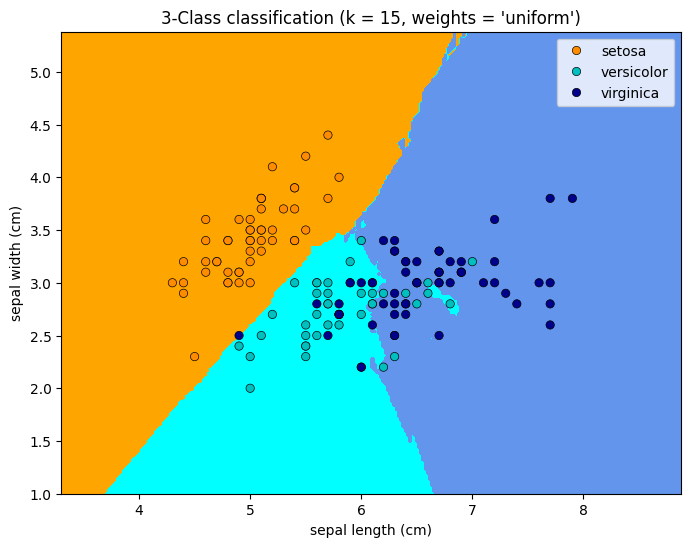

In [ ]:
plt.figure(figsize=(8, 6))
# Plot filled contour line
plt.contourf(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up a parameter grid for grid search
param_grid = {'n_neighbors': range(1, 21)}  # Range of k values to search over

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, verbose=0, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters found by grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the testing data using the best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Parameters: {'n_neighbors': 3}
Accuracy: 1.0


In [ ]:
best_knn

KNeighborsClassifier(n_neighbors=3)

### An application to the UCI ML Hand-written Digits Recognition
We use the `sklearn` built-in dataset on handwritten digits. This task is an example where k-NN works surprisingly well.

Pictures here are 8x8 matrices (intensity of white color for each pixel). Then each such matrix is ​​"unfolded" into a vector of length 64, and we obtain a feature description of an object.

In [ ]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target
X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

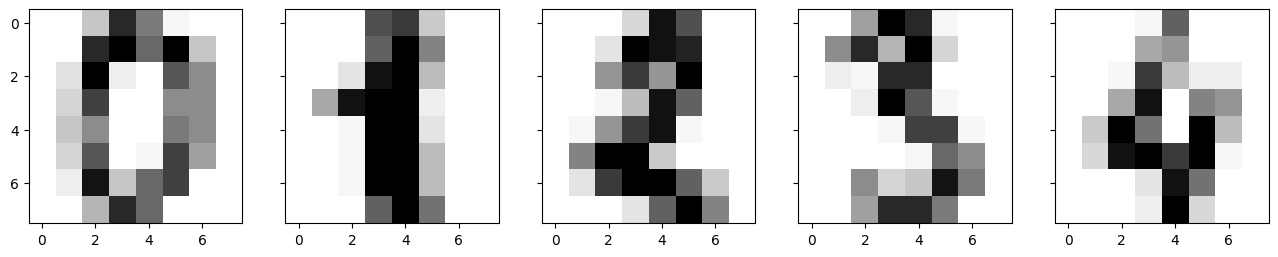

In [ ]:
# visualization of the digits data: the 8x8 matrices. Showing first several images.
num_images=5
f, axes = plt.subplots(1, num_images, sharey=True, figsize=(16, 6))
for i in range(num_images):
    axes[i].imshow(X[i, :].reshape([8, 8]), cmap="Greys");

In [ ]:
# randomly select 70% of the data as training dataset, 30% as testing dataset.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [ ]:
# run the KNNclassifier on the training data, and select k = 10
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

# predict on the testing data, and obtain the prediction accuracy
knn_pred = knn.predict(X_test)
accuracy_score(y_test,knn_pred)
# You can also check manually with
#np.not_equal(y_test, knn_pred)

0.9740740740740741

In [ ]:
# function that plots a single image.
def test_digit(i):
    fig = plt.figure()
    plt.imshow(X_test[i,:].reshape(8,8), interpolation='none')
    plt.title("digit:%d   prediction: %d" %(y_test[i], knn.predict(X_test[i,:].reshape(1,64))))
    plt.xticks([])
    plt.yticks([])

<ipython-input-26-b1fd791f3c3f>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("digit:%d   prediction: %d" %(y_test[i], knn.predict(X_test[i,:].reshape(1,64))))
<ipython-input-26-b1fd791f3c3f>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("digit:%d   prediction: %d" %(y_test[i], knn.predict(X_test[i,:].reshape(1,64))))
<ipython-input-26-b1fd791f3c3f>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("digit:%d   prediction: %d" %(y_

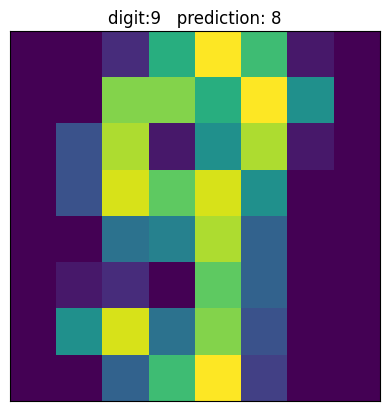

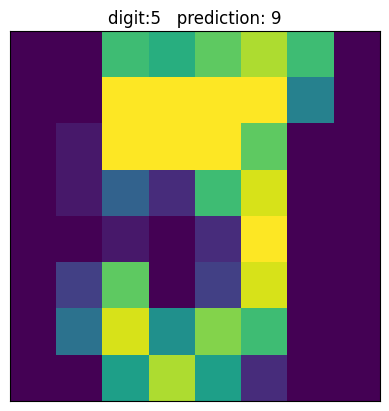

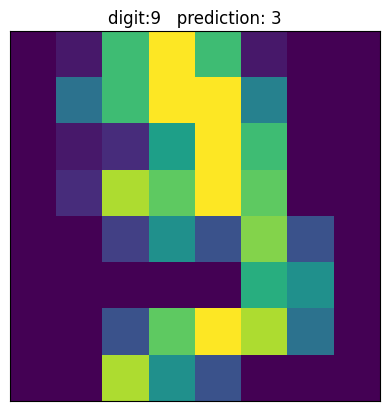

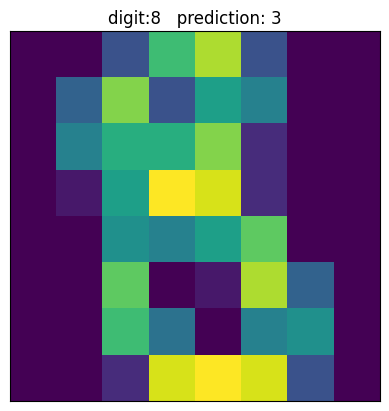

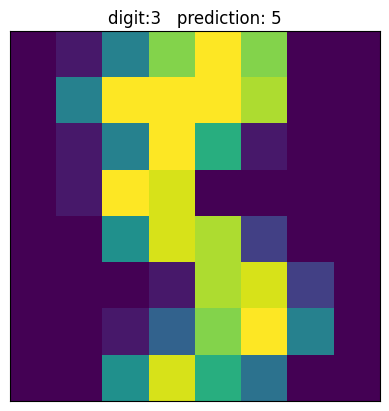

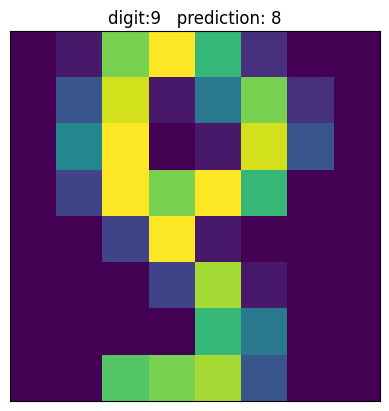

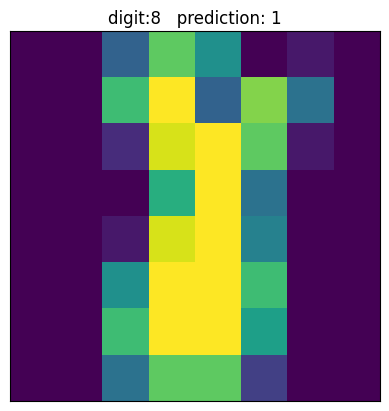

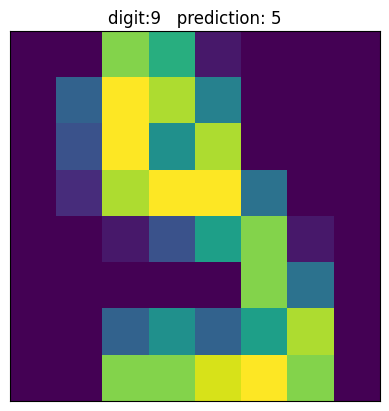

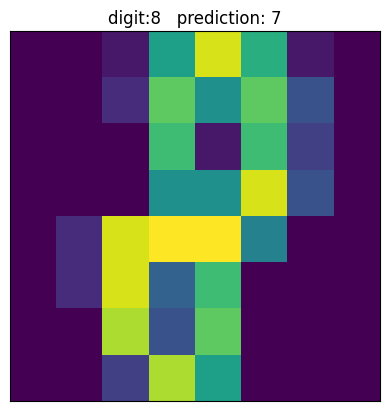

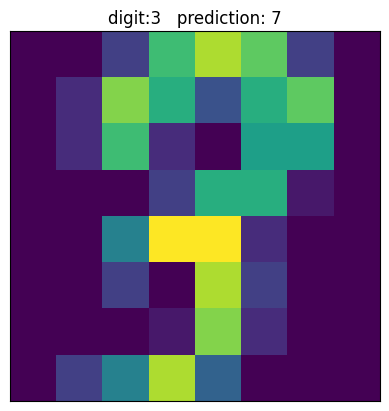

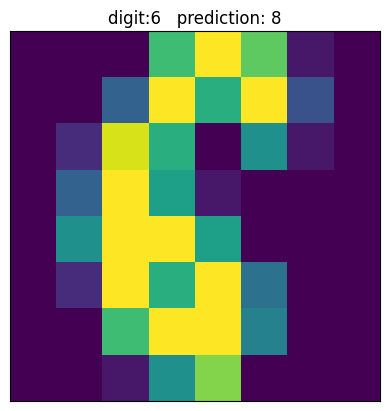

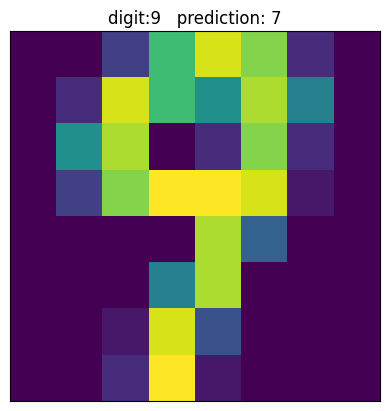

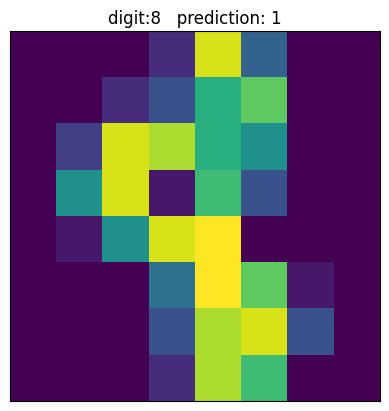

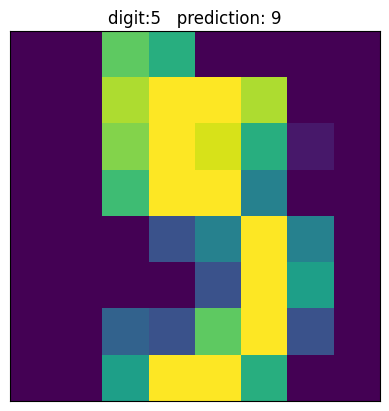

In [ ]:
# plot out the ones that KNN failed to predict.
fc_indice = np.argwhere(np.not_equal(y_test, knn_pred))
for i in fc_indice:
    test_digit(i)

###An Application to Running Data
`target`: draw the plot to show the decision boundary of knn method.

`Backgroud`: Running data set contains the records of whehter a machine can run under different weather conditions. There are three columns in the data set: `Temp`: Temperature, `Wind`: Wind speed, `Fun`: Indicator of whether the machine runs normally.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Load data
data = pd.read_csv('https://raw.githubusercontent.com/jtao/AdvancedML/main/data/Running.csv', header = 0)
train = np.column_stack([data.Temp, data.Wind])
data.head()

,Temp,Wind,Fun
0,75,1.0,Yes
1,61,10.7,No
2,42,12.3,No
3,72,5.8,Yes
4,38,1.3,No


In [ ]:
m = 100
test1 = np.linspace(min(data.Temp.to_numpy()), max(data.Temp.to_numpy()), num = m)
test2 = np.linspace(min(data.Wind.to_numpy()), max(data.Wind.to_numpy()), num = m)
y = data.Fun.to_numpy() #creates an array
k = 3
yhat = np.zeros((m, m))
fun = neighbors.KNeighborsClassifier(n_neighbors = k)
fun.fit(train, y)

KNeighborsClassifier(n_neighbors=3)

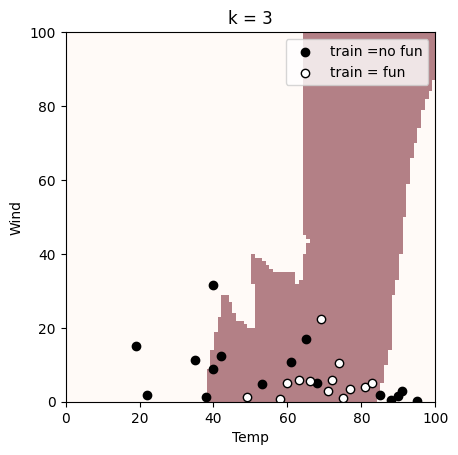

In [ ]:
for i in range(m):
    for j in range(m):
        test = np.array([test1[i], test2[j]]).reshape(1, -1) #reshaping the array with only one row and automatically determined number of columns
        res = fun.predict(test)
        if res == 'Yes':
            yhat[i , m - j - 1] = 1

plt.imshow(yhat.transpose(),vmin=0,vmax=1,cmap=plt.get_cmap("Reds"),alpha=0.5, extent = [0, 100, 0, 100])
plt.xlabel("Temp")
plt.ylabel("Wind")
plt.title('k = 3')
dot1 = plt.scatter(train[y == "No", 0], train[y == "No", 1], color = "black", edgecolor = "black")
dot2 = plt.scatter(train[y == "Yes", 0], train[y == "Yes", 1], color = "white", edgecolor = "black")
plt.legend("upper right", handles = [dot1, dot2], labels = ["train =no fun", "train = fun"])
plt.show()

## Decision Trees and Random Forests Algorithm
The decision trees are to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

<center><img src="https://github.com/Snehashis111/AdvancedML/blob/main/images/Beachdecisiontree.png?raw=1" width="600" /><br/>(Beach Decision Tree - Wikipedia)</center>

In [ ]:
# required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text,plot_tree
from six import StringIO
import pydot
from IPython.display import Image
from sklearn.metrics import accuracy_score

In [ ]:
# first class
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

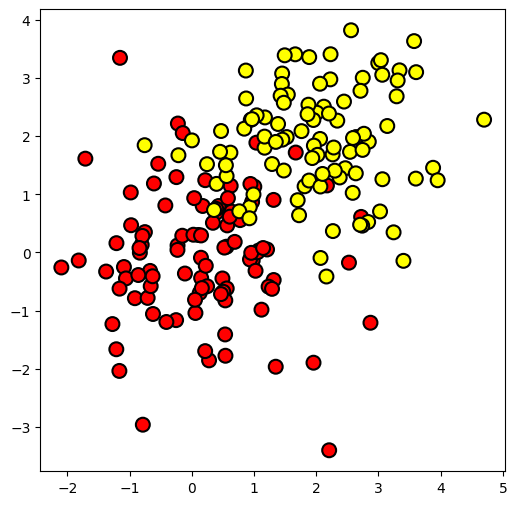

In [ ]:
# visualize the two classes
plt.figure(figsize=(6, 6))
plt.scatter(train_data[:, 0], train_data[:, 1],
            c=train_labels, s=100, cmap="autumn", edgecolors="black", linewidth=1.5)

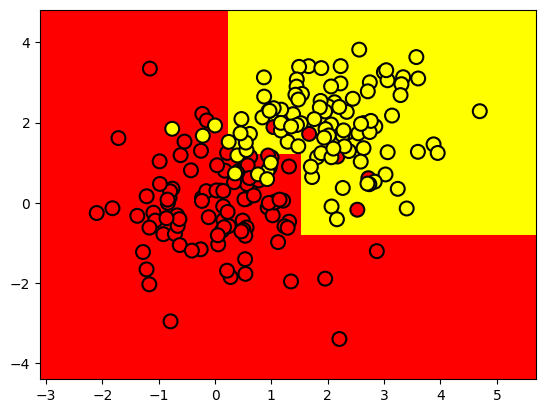

In [ ]:
# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
);

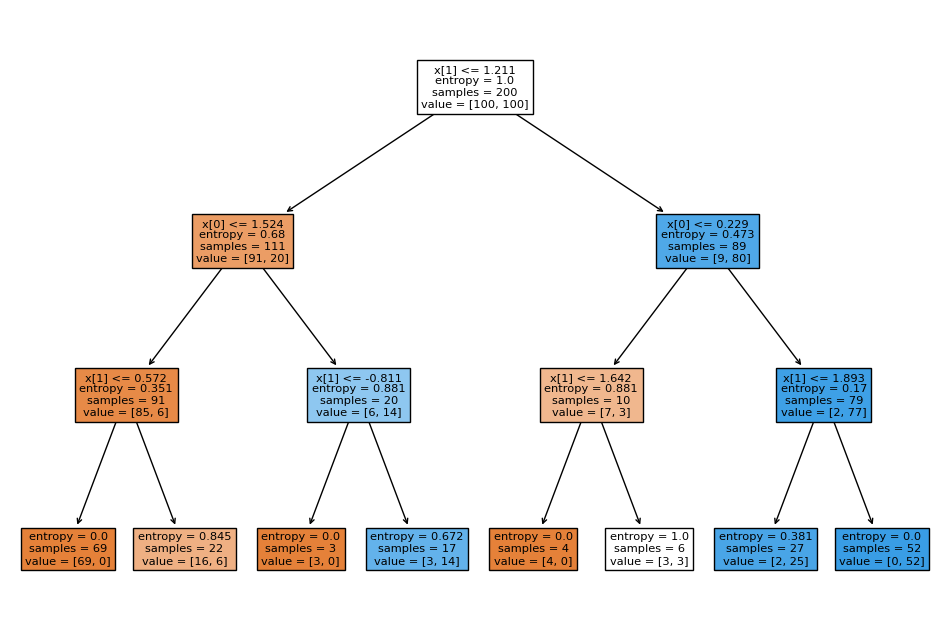

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(clf_tree, filled=True)
plt.show()

In [ ]:
def entropy(p):
    p = np.clip(p, 1e-10, 1 - 1e-10)
    return - (p * np.log2(p) + (1 - p) * np.log2(1 - p))

entropy(20/111)

np.float64(0.6804710541354337)

In [ ]:
entropy(9/89), entropy (0.5)

(np.float64(0.4725472219330292), np.float64(1.0))

#### Classification Tree - Clasify Things into Categories
Decision trees are white box model, very easily interpretable. But often do not have highest accuracy. <br>
Decision trees are built by the following steps:

*   Start with empty tree
*   Choose the best feature to split the tree by depending on splitting criteria (criterion argument in sklearn)
*   Split
*   Recurse

Some of the popular splitting criteria are information gain, Gini index etc. <br>
If we have K classes with relative frequencies $p_i, i \in \{1,2,⋯,K\}$


*   Gini index $G = \sum_{k=1}^K p_i(1-p_i)$. We calculate weighted sum of Gini Index for the child nodes then select the feature with lowest Gini index
*   Information Gain = $D(T)-D(T/a)$=Entropy of parent - weighted sum of entropies of children, where Entropy $D = -\sum_{k=1}^K p_i \log p_i$. We select the feature that produces highest information gain


### An Application to Heart Data
Background
* `Heart` dataset contains a binary outcome `HD` for 303 patients who presented with chest pain. An outcome value of `Yes` indicates the presence of hear disease based on an angiographic test, while `No` means no heart disease.

* There are 13 predictors including `Age`, `Sex`, `Chol` (a cholesterol measurement), `Thal`( Thallium stress test) and other heart and lung function measurements.


In [38]:
Heart = pd.read_csv('https://raw.githubusercontent.com/jtao/AdvancedML/main/data/Heart.csv').drop('Unnamed: 0', axis=1).dropna()
Heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [39]:
Heart.head(5)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
Heart.ChestPain

0           typical
1      asymptomatic
2      asymptomatic
3        nonanginal
4        nontypical
           ...     
297    asymptomatic
298         typical
299    asymptomatic
300    asymptomatic
301      nontypical
Name: ChestPain, Length: 297, dtype: object

In [ ]:
pd.factorize(Heart.ChestPain)

(array([0, 1, 1, 2, 3, 3, 1, 1, 1, 1, 1, 3, 2, 3, 2, 2, 3, 1, 2, 3, 0, 0,
        3, 2, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 3, 2,
        1, 2, 2, 1, 2, 2, 3, 1, 1, 3, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 1, 1,
        2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 2, 2, 3, 2, 2, 1,
        2, 1, 1, 2, 2, 2, 1, 1, 1, 3, 1, 1, 0, 1, 2, 2, 3, 1, 2, 1, 1, 1,
        1, 0, 1, 2, 3, 2, 1, 1, 1, 1, 1, 2, 1, 0, 3, 1, 1, 3, 1, 2, 2, 3,
        1, 2, 3, 1, 3, 1, 2, 3, 0, 3, 2, 2, 2, 1, 2, 3, 2, 0, 1, 2, 1, 1,
        1, 1, 1, 1, 2, 3, 1, 2, 1, 2, 1, 3, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1,
        2, 2, 1, 1, 0, 0, 1, 3, 2, 3, 3, 2, 2, 1, 1, 2, 1, 0, 1, 3, 0, 1,
        1, 2, 2, 1, 1, 1, 1, 3, 1, 2, 0, 2, 1, 1, 0, 3, 1, 1, 1, 2, 2, 2,
        1, 1, 3, 1, 2, 1, 1, 2, 1, 2, 3, 2, 1, 1, 1, 3, 3, 3, 3, 1, 0, 2,
        1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 2, 1, 2, 3, 3, 2, 3, 0, 2, 1, 1, 2,
        1, 2, 1, 1, 1, 1, 0, 0, 2, 2, 3, 1, 1, 2, 1, 3, 1, 1, 1, 3, 3, 2,
        3, 1, 1, 1, 3, 1, 1, 0, 1, 1, 

In [40]:
Heart.ChestPain = pd.factorize(Heart.ChestPain)[0]
Heart.Thal = pd.factorize(Heart.Thal)[0]
X2 = Heart.drop('AHD', axis=1) # explanatory variables
y2 = pd.factorize(Heart.AHD)[0] # response variables AHD

In [41]:
y2

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [42]:
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
clf.fit(X2,y2)

DecisionTreeClassifier(max_features=3, max_leaf_nodes=6)

In [43]:
clf.score(X2,y2) #Return the mean accuracy on the given data and labels.

0.7878787878787878

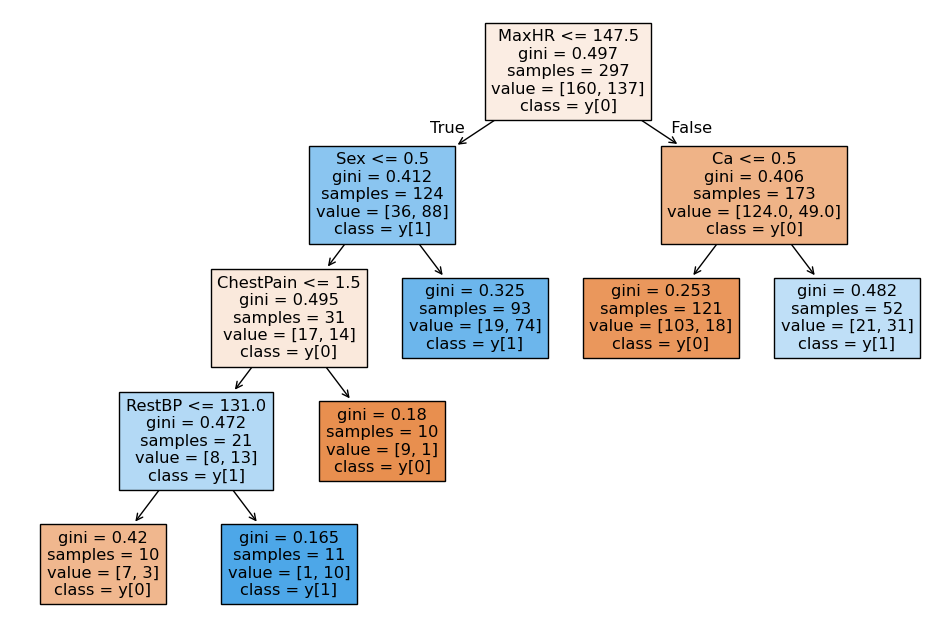

In [44]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X2.columns, class_names=True,filled=True)
plt.show()

## Random forests
Random forests is a widely used supervised learning method.


*   We bootstrap the sample data (with replacement)
*   With each bootstrap sample we built a decision tree but with a random sample of predictors instead of all the predictors
*   We use majority voting from all the decision trees to predict labels for unseen data

<center><img src="https://github.com/Snehashis111/AdvancedML/blob/main/images/RandomForest.png?raw=1" width="400" /><br/>(Credit: analyticsvidhya.com)</center>


### Random Forests vs Decision Trees

* Random forests is a set of multiple decision trees.
* Deep decision trees may suffer from overfitting, but random forests prevents overfitting by creating trees on random subsets.
* Decision trees are computationally faster.
* Random forests is difficult to interpret, while a decision tree is easily interpretable and can be converted to rules.


## An Application to Iris Data with Decision Trees and Random Forests

In [45]:
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [47]:
X.shape,X_train.shape

((150, 4), (105, 4))

In [48]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

clf2 = DecisionTreeClassifier(criterion="entropy",max_depth=3)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)
clf2.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

# the accuracy of random forest prediction
print(accuracy_score(y_test,y_pred))
# the accuracy of decision tree prediction
print(accuracy_score(y_test,y_pred2))

0.9555555555555556
0.9333333333333333


Grid search on Random Forest : https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv

## Support Vector Machines
Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression.
<center><img src="https://github.com/Snehashis111/AdvancedML/blob/main/images/SVM_margin.png?raw=1" width="300" /><br/>(Credit: wikipedia.org)</center>

### Algorithm:
Support Vector Machine (SVM) is supervsied learning classification algorithm.
* Consider a simple binary classification problem: a linearly separable data in 2-dim.
* We try to find a boundary that divides the data into two class such that the misclassification  is minimized.
* Different lines can be used as separators between samples. Depending on the line we choose, a new point marked by 'x' in the plot will be assigned a different label.

<br>
If you want to know in details:
https://www.youtube.com/watch?v=_PwhiWxHK8o

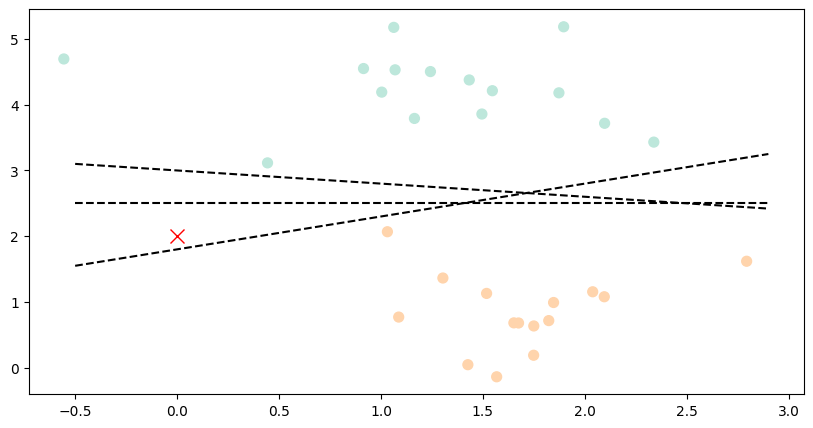

In [9]:
from scipy import stats
import seaborn as sns
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 30, centers = 2, random_state = 0, cluster_std = 0.6)

plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = "icefire")

xfit = np.arange(-0.5, 3.0, 0.1)
for m, b in [(0.0, 2.5), (0.5, 1.8), (-0.2, 3.0)]:
    plt.plot(xfit, m * xfit + b, '--k')
plt.plot([0.0], [2.0], 'x', color = 'red', markersize = 10);

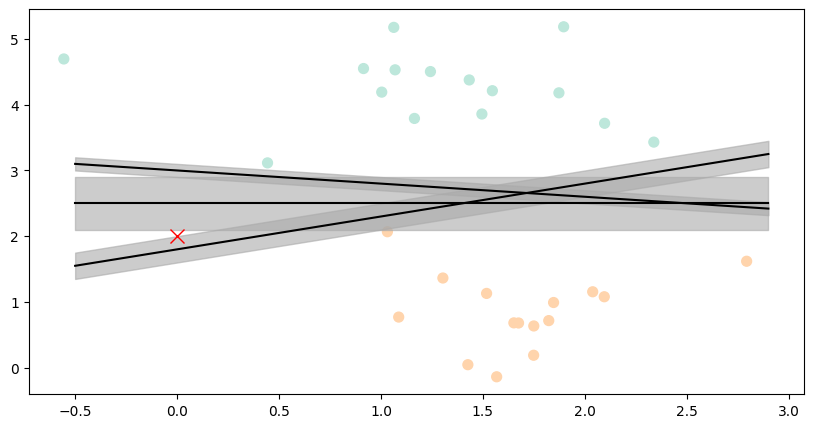

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = "icefire")
xfit = np.arange(-0.5, 3.0, 0.1)
for m, b, d in [(0.0, 2.5, 0.4), (0.5, 1.8, 0.2), (-0.2, 3.0, 0.1)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.6)
plt.plot([0.0], [2.0], 'x', color = 'red', markersize = 10)
plt.show()

To fit a SVM model on this generated dataset.

In [11]:
# for visualization
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

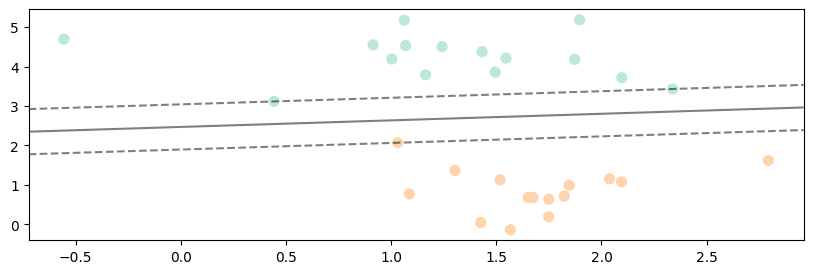

In [12]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

plt.figure(figsize = (10,3))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='icefire')
plot_svc_decision_function(model)

This is the dividing line that maximizes the margin between two sets of points. There are some points touching the margin which are the pivotal elements of this fit known as the support vectors and can be returned by `support_vectors_`. A key to this classifier is that only the position of the support vectors matter. The points that are further away from the margin on the correct side do not change the fit.

In [53]:
model.support_vectors_

array([[2.33812285, 3.43116792],
       [0.44359863, 3.11530945],
       [1.03150541, 2.0681289 ]])

This method can be extended to nonlinear boundaries with kernels which gives the Kernel SVM where we can map the data into higher-dimensional space defined by basis function and find a linear classifier for the nonlinear relationship.

In [54]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVC classifier
svc = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can adjust parameters like kernel, C, and gamma as needed

# Train the classifier on the training data
svc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svc.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

$C$ and gamma are two parameters that needs to be optimized. <br>
$C$ is like penalty for misclassification, for larger values of $C$ the algorithm tries to classify all training points correctly leading to a smaller margin. Whereas a very small value of $C$ will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.<br>
The gamma parameter controls the influence of a single training example on the decision boundary. A low gamma value leads to a smoother decision boundary, suitable for simpler models or datasets with a large number of samples, while a high gamma value leads to a more complex decision boundary, suitable for more complex models or datasets with fewer samples. <br>
Ideally both of them are selected via grid search method.

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up a parameter grid for grid search
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}  # We only use an RBF kernel for this example

# Create an SVC classifier
svc = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters found by grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the testing data using the best model
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 1.0


In [56]:
best_svc

SVC(C=100, gamma=0.01)

### SVM - Pros and Cons

Advantages:
- Efficient with very compact models
- Fast prediction phase
- Works with high dimensional datasets (method of choice for computer vision tasks before CNN)
- Works with different data types with the kernel methods

Disadvantages:
- The scaling with the number of samples $N$ is $\mathcal{O}[N^3]$ at worst, or $\mathcal{O}[N^2]$ for efficient implementations.
- The results are sensitive to the softening parameter $C$, which is expensive to tune for large data sets.

## Evaluating the classification models:<br>
Accuracy is not a good measure for unbalanced data. Precision, recall, F-score are some of the most popular measure used to evaluate a classification model.<br>

Precision tells us what proportion of positive identifications was actually correct. A model that produces no false positives has precision 1.

Recall/Sensitivity/True Positive Rate tells us what proportion of actual positives was identified correctly. A model that produces no false negatives has a recall of 1.

Specificity/True Negative Rate given by  $\frac{TN}{TN+FP}$ measures proportion of actual negatives correctly identified by model.


<center><img src="https://github.com/Snehashis111/AdvancedML/blob/main/images/PrecisionRecallKDNuggets.JPG?raw=1" width="600" /><br/>(Credit: KDNuggets)</center> <br>

To fully evaluate a model we must know both the precision and the recall but they are often in tension, improving one reduces the other. So a new metric comes in picture named $F1$ score which is the harmonic mean of Precision and Recall.<br>
$$F1 = 2 * \frac{precision * recall}{precision + recall}
$$



In [15]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create an SVC classifier
svc = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can adjust parameters like kernel, C, and gamma as needed

# Train the classifier on the training data
svc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
accuracy = precision_score(y_test, y_pred,average='weighted')
print("Precision:", accuracy)
accuracy = recall_score(y_test, y_pred,average='weighted')
print("Recall:", accuracy)
accuracy = f1_score(y_test, y_pred,average='weighted')
print("F1:", accuracy)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])